In [1]:

import pandas as pd

import numpy as np

from datetime import datetime

%matplotlib inline

pd.set_option('display.max_rows', 500)

## Data Preparation

Focus is to understand the final data structure

Support each step by visual analytics

## John Hopkins GITHUB csv Data

In [2]:
data_path='C:/Users/Nitin/ds-covid19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [3]:
pd_raw

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1199,1199,1215,1215,1215,1261,1261,1301,1301,1344
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,2777,2805,2876,2935,2965,2981,3033,3092,3217,3279
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,94,95,95,95,95,95,95,95,95,95
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,439172,451198,461882,471806,478792,488007,500034,512293,524198,535705
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,44075,44271,44461,44649,44783,44845,44953,45152,45326,45503
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,4091,4099,4104,4114,4118,4126,4135,4142,4152,4157


In [4]:
pd_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '9/2/20', '9/3/20', '9/4/20', '9/5/20', '9/6/20', '9/7/20', '9/8/20',
       '9/9/20', '9/10/20', '9/11/20'],
      dtype='object', length=234)

In [5]:
time_idx=pd_raw.columns[4:]

In [6]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [7]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                   Antigua and Barbuda
6                             Argentina
7                               Armenia
8                             Australia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                              Austria
17                           Azerbaijan
18                              Bahamas
19                              Bahrain
20                           Bangladesh
21                             Barbados
22                              Belarus
23                              Belgium
24                               Belize


In [8]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
1/27/20         1
1/28/20         4
1/29/20         4
1/30/20         4
1/31/20         5
2/1/20          8
2/2/20         10
2/3/20         12
2/4/20         12
2/5/20         12
2/6/20         12
2/7/20         13
2/8/20         13
2/9/20         14
2/10/20        14
2/11/20        16
2/12/20        16
2/13/20        16
2/14/20        16
2/15/20        16
2/16/20        16
2/17/20        16
2/18/20        16
2/19/20        16
2/20/20        16
2/21/20        16
2/22/20        16
2/23/20        16
2/24/20        16
2/25/20        17
2/26/20        27
2/27/20        46
2/28/20        48
2/29/20        79
3/1/20        130
3/2/20        159
3/3/20        196
3/4/20        262
3/5/20        482
3/6/20        670
3/7/20        799
3/8/20       1040
3/9/20       1176
3/10/20      1457
3/11/20      1908
3/12/20      2078
3/13/20      3675
3/14/20      4585
3/15/20      5795
3/16/20      7272
3/17/20   

In [9]:
country_list=['Italy',
             'US',
             'Spain',
             'Germany',
             'Korea,South',
             ]

In [10]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

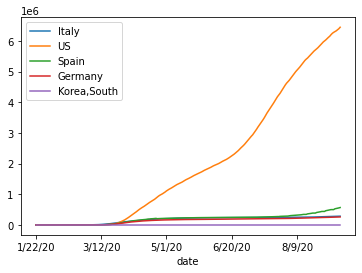

In [11]:
%matplotlib inline
df_plot.set_index('date').plot()

## Data Type Date

In [12]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea,South"
0,1/22/20,0,1,0,0,0
1,1/23/20,0,1,0,0,0
2,1/24/20,0,2,0,0,0
3,1/25/20,0,2,0,0,0
4,1/26/20,0,5,0,0,0


In [13]:
from datetime import datetime

In [14]:
time_idx=[datetime.strptime(each,"%m/%d/%y") for each in df_plot.date] #convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] #convert back to date ISO norm (str)

In [15]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea,South"
0,2020-01-22,0,1,0,0,0
1,2020-01-23,0,1,0,0,0
2,2020-01-24,0,2,0,0,0
3,2020-01-25,0,2,0,0,0
4,2020-01-26,0,5,0,0,0


In [17]:
df_plot.to_csv('C:/Users/Nitin/ds-covid19/data/processed/COVID_small_flat_table.csv',sep=';',index=False)

## Relational Data Model  - defining a Primary Key

In a relational model, a primary key is a specific choice of a minimal set of attributes (columns) that uniquely specify a tuple (row) in a relation (table) (Source: Wiki)

The main features of a primary key are:

It must contain a unique value for each row of data

It cannot contain null values

In [18]:
data_path='C:/Users/Nitin/ds-covid19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1199,1199,1215,1215,1215,1261,1261,1301,1301,1344
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2777,2805,2876,2935,2965,2981,3033,3092,3217,3279


In [19]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                                   'Province/State':'state'})

In [20]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606
1,NaN,Albania,0,0,0,0,0,0,0,0,...,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,1199,1199,1215,1215,1215,1261,1261,1301,1301,1344
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2777,2805,2876,2935,2965,2981,3033,3092,3217,3279


In [21]:
pd_relational_model=pd_data_base.set_index(['state','country'])\
                                .T                             \
                                .stack(level=[0,1])            \
                                .reset_index()                 \
                                .rename(columns={'level_0':'date',
                                                0:'confirmed'},
                                       )
pd_relational_model

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0
...,...,...,...,...
105763,9/11/20,Zhejiang,West Bank and Gaza,29256.0
105764,9/11/20,Zhejiang,Western Sahara,10.0
105765,9/11/20,Zhejiang,Yemen,2007.0
105766,9/11/20,Zhejiang,Zambia,13323.0


In [22]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [23]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [24]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [25]:
df_plot.to_csv('C:/Users/Nitin/ds-covid19/data/processed/COVID_relational_confirmed.csv',sep=';')

## Group-by Apply

In [26]:
pd_JH_data=pd.read_csv('C:/Users/Nitin/ds-covid19/data/processed/COVID_relational_confirmed.csv',sep=';',parse_dates=[0])
pd_JH_data=pd_JH_data.sort_values('date',ascending=True).reset_index(drop=True).copy()
pd_JH_data.head()

,Unnamed: 0,date,Italy,US,Spain,Germany,"Korea,South"
0,0,2020-01-22,0,1,0,0,0
1,1,2020-01-23,0,1,0,0,0
2,2,2020-01-24,0,2,0,0,0
3,3,2020-01-25,0,2,0,0,0
4,4,2020-01-26,0,5,0,0,0


In [27]:
test_data=pd_JH_data[((pd_JH_data['country']=='US')|
                     (pd_JH_data['country']=='Germany'))&
                     (pd_JH_data['date']>'2020-03-20')]

KeyError: 'country'

In [ ]:
test_data

In [ ]:
test_data.groupby(['country']).agg(np.max)

In [ ]:
# %load C:\Users\Nitin\ds-covid19\src\features\build_features.py
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)

def get_doubling_time_via_regression(in_array):
    ''' Use a linear regression to approximate the doubling rate'''

    y = np.array(in_array)
    X = np.arange(-1,2).reshape(-1,1)

    assert len(in_array)

    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_

    return intercept/slope



if __name__ == '__main__':
    test_data=np.array([2,4,6])
    result=get_doubling_time_via_regression(test_data)
    print('The test slope is: '+str(result))


In [ ]:
test_data.groupby(['state','country']).agg(np.max)

In [ ]:
#test_data.groupby(['state','country']).apply(get_doubling_time_via_regression)

In [ ]:
def rolling_reg(df_input,col='confirmed'):
    ''' input has to be a data frame'''
    ''' return is single series (mandatory for group apply)'''
    days_back=3
    result=df_input[col].rolling(
                window=days_back,
                min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)
    return result

In [ ]:
test_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed')

In [ ]:
pd_DR_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed').reset_index()

In [ ]:
pd_DR_result=pd_DR_result.rename(columns={'confirmed':'doubling_rate',
                                         'level_2':'index'})
pd_DR_result.head()

In [ ]:
pd_JH_data=pd_JH_data.reset_index().head()
pd_JH_data.head()

In [ ]:
pd_result_larg=pd.merge(pd_JH_data,pd_DR_result[['index','doubling_rate']],on=['index'],how='left')

In [ ]:
#pd_result_larg[pd_result_larg['country']=='Germany']